In [10]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os
import pickle
import seaborn as sns
import datetime as dt
from model import StockEnv,get_scaler, play_one_episode, LinearModel, DQNAgent
from tqdm.notebook import tqdm
import pyfolio as pf
%matplotlib inline

Stock name: ENB
Start: 2013-02-19 00:00:00, End: 2020-12-31 00:00:00
Training data: 1227 
Tsesting data: 756 


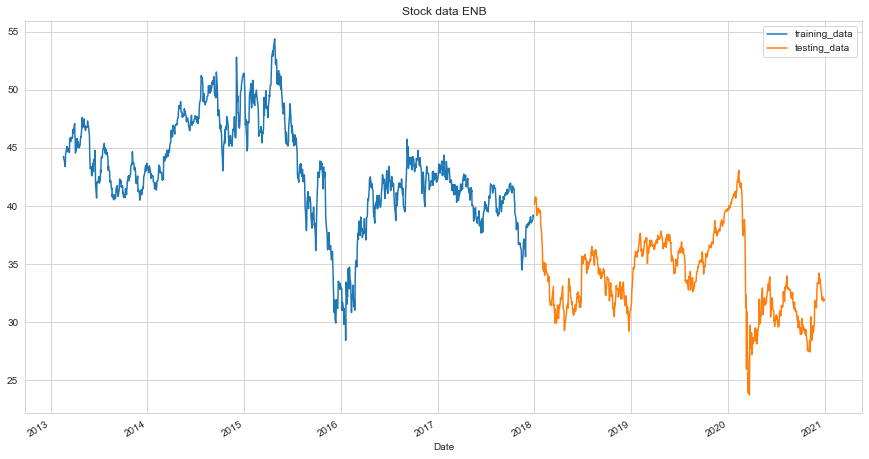

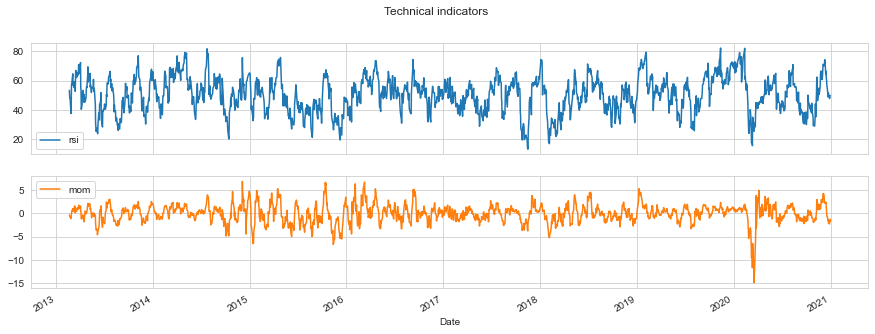

In [11]:
stock_name = 'enb'.upper()
industry = 'Energy'
stock_data = pd.read_csv(f'../train_test_data/{stock_name}.csv', index_col=['Date'], parse_dates=True)

train_data = stock_data.loc[:'2018-01-01']
test_data = stock_data.loc['2018-01-01':]

print(f'Stock name: {stock_name}')
print(f'Start: {stock_data.index[0]}, End: {stock_data.index[-1]}')
print(f'Training data: {len(train_data)} ')
print(f'Tsesting data: {len(test_data)} ')

sns.set_style('whitegrid')
train_data['Adj Close'].plot(label='training_data', figsize=(15,8));
test_data['Adj Close'].plot(label='testing_data');
plt.title('Stock data '+ stock_name)
plt.legend();
plt.show()

stock_data[['rsi', 'mom']].plot(subplots=True, figsize=(15,5), title='Technical indicators');
plt.show()




In [12]:
num_episodes = 2000
batch_size = 32
capital = 1000
data = stock_data['Adj Close'].values
n_timesteps = data.shape[0]


env = StockEnv(train_data, capital)
state_size = env.state_dim
action_size = 2
agent = DQNAgent(state_size, action_size)
scaler = get_scaler(env)

  0%|          | 0/2000 [00:00<?, ?it/s]

episode: 1/2000, episode end value: 1102.16, duration: 0:00:00.215193
episode: 2/2000, episode end value: 1057.99, duration: 0:00:00.214099
episode: 3/2000, episode end value: 1111.12, duration: 0:00:00.194044
episode: 4/2000, episode end value: 1066.90, duration: 0:00:00.194633
episode: 5/2000, episode end value: 1066.35, duration: 0:00:00.199536
episode: 6/2000, episode end value: 1191.82, duration: 0:00:00.199072
episode: 7/2000, episode end value: 1043.68, duration: 0:00:00.198049
episode: 8/2000, episode end value: 1079.55, duration: 0:00:00.206135
episode: 9/2000, episode end value: 1066.03, duration: 0:00:00.209798
episode: 10/2000, episode end value: 1093.79, duration: 0:00:00.210048
episode: 11/2000, episode end value: 1086.48, duration: 0:00:00.203059
episode: 12/2000, episode end value: 1060.39, duration: 0:00:00.206046
episode: 13/2000, episode end value: 1047.27, duration: 0:00:00.204418
episode: 14/2000, episode end value: 1031.17, duration: 0:00:00.202046
episode: 15/200

episode: 118/2000, episode end value: 1065.36, duration: 0:00:00.171043
episode: 119/2000, episode end value: 1069.84, duration: 0:00:00.190051
episode: 120/2000, episode end value: 1088.74, duration: 0:00:00.202037
episode: 121/2000, episode end value: 1111.44, duration: 0:00:00.194045
episode: 122/2000, episode end value: 1061.33, duration: 0:00:00.174040
episode: 123/2000, episode end value: 1080.88, duration: 0:00:00.196044
episode: 124/2000, episode end value: 1052.80, duration: 0:00:00.197045
episode: 125/2000, episode end value: 1054.26, duration: 0:00:00.196049
episode: 126/2000, episode end value: 1133.79, duration: 0:00:00.194026
episode: 127/2000, episode end value: 1046.39, duration: 0:00:00.201126
episode: 128/2000, episode end value: 1097.21, duration: 0:00:00.202463
episode: 129/2000, episode end value: 1121.51, duration: 0:00:00.204014
episode: 130/2000, episode end value: 1036.72, duration: 0:00:00.190073
episode: 131/2000, episode end value: 1081.23, duration: 0:00:00

episode: 233/2000, episode end value: 1042.53, duration: 0:00:00.198058
episode: 234/2000, episode end value: 1065.29, duration: 0:00:00.192101
episode: 235/2000, episode end value: 1126.68, duration: 0:00:00.203862
episode: 236/2000, episode end value: 1112.33, duration: 0:00:00.197042
episode: 237/2000, episode end value: 1028.95, duration: 0:00:00.190030
episode: 238/2000, episode end value: 1094.35, duration: 0:00:00.202049
episode: 239/2000, episode end value: 1099.35, duration: 0:00:00.209031
episode: 240/2000, episode end value: 1050.26, duration: 0:00:00.208046
episode: 241/2000, episode end value: 1117.57, duration: 0:00:00.201060
episode: 242/2000, episode end value: 1105.32, duration: 0:00:00.202059
episode: 243/2000, episode end value: 1070.45, duration: 0:00:00.200044
episode: 244/2000, episode end value: 1123.66, duration: 0:00:00.200666
episode: 245/2000, episode end value: 1025.87, duration: 0:00:00.196041
episode: 246/2000, episode end value: 1065.38, duration: 0:00:00

episode: 348/2000, episode end value: 1066.30, duration: 0:00:00.199038
episode: 349/2000, episode end value: 1050.98, duration: 0:00:00.214032
episode: 350/2000, episode end value: 1053.11, duration: 0:00:00.205047
episode: 351/2000, episode end value: 1100.05, duration: 0:00:00.204061
episode: 352/2000, episode end value: 1037.95, duration: 0:00:00.196044
episode: 353/2000, episode end value: 1077.55, duration: 0:00:00.196050
episode: 354/2000, episode end value: 1058.65, duration: 0:00:00.198037
episode: 355/2000, episode end value: 1059.16, duration: 0:00:00.207040
episode: 356/2000, episode end value: 1049.37, duration: 0:00:00.196041
episode: 357/2000, episode end value: 1051.37, duration: 0:00:00.201050
episode: 358/2000, episode end value: 1064.11, duration: 0:00:00.195041
episode: 359/2000, episode end value: 1044.82, duration: 0:00:00.203030
episode: 360/2000, episode end value: 1094.09, duration: 0:00:00.201057
episode: 361/2000, episode end value: 1104.17, duration: 0:00:00

episode: 462/2000, episode end value: 1037.09, duration: 0:00:00.200045
episode: 463/2000, episode end value: 1090.01, duration: 0:00:00.191055
episode: 464/2000, episode end value: 1050.98, duration: 0:00:00.207034
episode: 465/2000, episode end value: 1091.32, duration: 0:00:00.195052
episode: 466/2000, episode end value: 1056.45, duration: 0:00:00.203060
episode: 467/2000, episode end value: 1062.16, duration: 0:00:00.200044
episode: 468/2000, episode end value: 1052.50, duration: 0:00:00.195037
episode: 469/2000, episode end value: 1057.61, duration: 0:00:00.198052
episode: 470/2000, episode end value: 1072.82, duration: 0:00:00.192037
episode: 471/2000, episode end value: 1077.53, duration: 0:00:00.206047
episode: 472/2000, episode end value: 1098.04, duration: 0:00:00.202041
episode: 473/2000, episode end value: 1049.05, duration: 0:00:00.217565
episode: 474/2000, episode end value: 1048.77, duration: 0:00:00.205232
episode: 475/2000, episode end value: 1090.57, duration: 0:00:00

episode: 576/2000, episode end value: 1057.86, duration: 0:00:00.204035
episode: 577/2000, episode end value: 1059.81, duration: 0:00:00.207055
episode: 578/2000, episode end value: 1070.89, duration: 0:00:00.206051
episode: 579/2000, episode end value: 1050.11, duration: 0:00:00.207049
episode: 580/2000, episode end value: 1059.11, duration: 0:00:00.206140
episode: 581/2000, episode end value: 1055.20, duration: 0:00:00.204347
episode: 582/2000, episode end value: 1071.13, duration: 0:00:00.194246
episode: 583/2000, episode end value: 1071.41, duration: 0:00:00.196038
episode: 584/2000, episode end value: 1054.43, duration: 0:00:00.207033
episode: 585/2000, episode end value: 1138.99, duration: 0:00:00.212048
episode: 586/2000, episode end value: 1040.41, duration: 0:00:00.200046
episode: 587/2000, episode end value: 1046.72, duration: 0:00:00.205050
episode: 588/2000, episode end value: 1111.37, duration: 0:00:00.218038
episode: 589/2000, episode end value: 1050.99, duration: 0:00:00

episode: 690/2000, episode end value: 1067.69, duration: 0:00:00.198312
episode: 691/2000, episode end value: 1064.01, duration: 0:00:00.201440
episode: 692/2000, episode end value: 1045.11, duration: 0:00:00.203894
episode: 693/2000, episode end value: 1105.89, duration: 0:00:00.202046
episode: 694/2000, episode end value: 1042.58, duration: 0:00:00.197037
episode: 695/2000, episode end value: 1091.58, duration: 0:00:00.205054
episode: 696/2000, episode end value: 1055.86, duration: 0:00:00.209041
episode: 697/2000, episode end value: 1058.06, duration: 0:00:00.210033
episode: 698/2000, episode end value: 1132.66, duration: 0:00:00.202059
episode: 699/2000, episode end value: 1096.76, duration: 0:00:00.210036
episode: 700/2000, episode end value: 1052.09, duration: 0:00:00.199044
episode: 701/2000, episode end value: 1098.46, duration: 0:00:00.202061
episode: 702/2000, episode end value: 1081.97, duration: 0:00:00.213032
episode: 703/2000, episode end value: 1104.71, duration: 0:00:00

episode: 805/2000, episode end value: 1071.92, duration: 0:00:00.214038
episode: 806/2000, episode end value: 1050.94, duration: 0:00:00.201059
episode: 807/2000, episode end value: 1052.50, duration: 0:00:00.211051
episode: 808/2000, episode end value: 1085.62, duration: 0:00:00.206028
episode: 809/2000, episode end value: 1107.04, duration: 0:00:00.200053
episode: 810/2000, episode end value: 1051.75, duration: 0:00:00.221058
episode: 811/2000, episode end value: 1055.51, duration: 0:00:00.209040
episode: 812/2000, episode end value: 1083.21, duration: 0:00:00.212050
episode: 813/2000, episode end value: 1037.65, duration: 0:00:00.209023
episode: 814/2000, episode end value: 1095.33, duration: 0:00:00.205052
episode: 815/2000, episode end value: 1058.10, duration: 0:00:00.197031
episode: 816/2000, episode end value: 1052.30, duration: 0:00:00.210046
episode: 817/2000, episode end value: 1052.04, duration: 0:00:00.206062
episode: 818/2000, episode end value: 1094.58, duration: 0:00:00

episode: 920/2000, episode end value: 1051.37, duration: 0:00:00.210031
episode: 921/2000, episode end value: 1046.95, duration: 0:00:00.213055
episode: 922/2000, episode end value: 1088.75, duration: 0:00:00.208047
episode: 923/2000, episode end value: 1048.65, duration: 0:00:00.206032
episode: 924/2000, episode end value: 1094.05, duration: 0:00:00.205043
episode: 925/2000, episode end value: 1054.35, duration: 0:00:00.239068
episode: 926/2000, episode end value: 1053.00, duration: 0:00:00.224035
episode: 927/2000, episode end value: 1068.74, duration: 0:00:00.245056
episode: 928/2000, episode end value: 1090.40, duration: 0:00:00.225055
episode: 929/2000, episode end value: 1044.11, duration: 0:00:00.210044
episode: 930/2000, episode end value: 1097.47, duration: 0:00:00.206047
episode: 931/2000, episode end value: 1123.80, duration: 0:00:00.232053
episode: 932/2000, episode end value: 1051.98, duration: 0:00:00.228049
episode: 933/2000, episode end value: 1059.76, duration: 0:00:00

episode: 1034/2000, episode end value: 1065.65, duration: 0:00:00.207003
episode: 1035/2000, episode end value: 1111.66, duration: 0:00:00.213018
episode: 1036/2000, episode end value: 1047.75, duration: 0:00:00.211008
episode: 1037/2000, episode end value: 1067.34, duration: 0:00:00.211005
episode: 1038/2000, episode end value: 1049.50, duration: 0:00:00.211002
episode: 1039/2000, episode end value: 1053.83, duration: 0:00:00.198863
episode: 1040/2000, episode end value: 1050.05, duration: 0:00:00.219152
episode: 1041/2000, episode end value: 1050.17, duration: 0:00:00.215997
episode: 1042/2000, episode end value: 1068.98, duration: 0:00:00.205402
episode: 1043/2000, episode end value: 1072.10, duration: 0:00:00.201038
episode: 1044/2000, episode end value: 1063.18, duration: 0:00:00.205032
episode: 1045/2000, episode end value: 1072.38, duration: 0:00:00.201061
episode: 1046/2000, episode end value: 1073.00, duration: 0:00:00.210046
episode: 1047/2000, episode end value: 1105.33, dur

episode: 1148/2000, episode end value: 1042.96, duration: 0:00:00.203033
episode: 1149/2000, episode end value: 1049.58, duration: 0:00:00.204047
episode: 1150/2000, episode end value: 1080.20, duration: 0:00:00.204961
episode: 1151/2000, episode end value: 1054.96, duration: 0:00:00.215047
episode: 1152/2000, episode end value: 1046.78, duration: 0:00:00.212723
episode: 1153/2000, episode end value: 1038.63, duration: 0:00:00.212990
episode: 1154/2000, episode end value: 1107.73, duration: 0:00:00.215012
episode: 1155/2000, episode end value: 1072.32, duration: 0:00:00.208984
episode: 1156/2000, episode end value: 1078.03, duration: 0:00:00.214327
episode: 1157/2000, episode end value: 1053.97, duration: 0:00:00.225065
episode: 1158/2000, episode end value: 1047.71, duration: 0:00:00.217050
episode: 1159/2000, episode end value: 1066.55, duration: 0:00:00.208045
episode: 1160/2000, episode end value: 1058.40, duration: 0:00:00.220049
episode: 1161/2000, episode end value: 1062.47, dur

episode: 1261/2000, episode end value: 1075.38, duration: 0:00:00.208045
episode: 1262/2000, episode end value: 1043.46, duration: 0:00:00.203046
episode: 1263/2000, episode end value: 1049.61, duration: 0:00:00.208164
episode: 1264/2000, episode end value: 1033.85, duration: 0:00:00.202387
episode: 1265/2000, episode end value: 1032.59, duration: 0:00:00.207028
episode: 1266/2000, episode end value: 1072.63, duration: 0:00:00.216058
episode: 1267/2000, episode end value: 1043.48, duration: 0:00:00.199054
episode: 1268/2000, episode end value: 1059.78, duration: 0:00:00.213047
episode: 1269/2000, episode end value: 1057.91, duration: 0:00:00.201044
episode: 1270/2000, episode end value: 1107.92, duration: 0:00:00.203045
episode: 1271/2000, episode end value: 1102.72, duration: 0:00:00.207040
episode: 1272/2000, episode end value: 1047.18, duration: 0:00:00.214048
episode: 1273/2000, episode end value: 1051.66, duration: 0:00:00.209046
episode: 1274/2000, episode end value: 1123.65, dur

episode: 1374/2000, episode end value: 1043.45, duration: 0:00:00.209054
episode: 1375/2000, episode end value: 1047.03, duration: 0:00:00.206033
episode: 1376/2000, episode end value: 1044.98, duration: 0:00:00.204062
episode: 1377/2000, episode end value: 1147.19, duration: 0:00:00.215033
episode: 1378/2000, episode end value: 1120.14, duration: 0:00:00.216048
episode: 1379/2000, episode end value: 1043.05, duration: 0:00:00.223066
episode: 1380/2000, episode end value: 1059.01, duration: 0:00:00.221049
episode: 1381/2000, episode end value: 1058.14, duration: 0:00:00.218048
episode: 1382/2000, episode end value: 1049.81, duration: 0:00:00.203053
episode: 1383/2000, episode end value: 1042.75, duration: 0:00:00.212047
episode: 1384/2000, episode end value: 1051.19, duration: 0:00:00.204053
episode: 1385/2000, episode end value: 1048.64, duration: 0:00:00.204046
episode: 1386/2000, episode end value: 1042.35, duration: 0:00:00.201043
episode: 1387/2000, episode end value: 1161.12, dur

episode: 1487/2000, episode end value: 1114.46, duration: 0:00:00.222042
episode: 1488/2000, episode end value: 1057.16, duration: 0:00:00.218051
episode: 1489/2000, episode end value: 1097.10, duration: 0:00:00.215048
episode: 1490/2000, episode end value: 1054.58, duration: 0:00:00.218048
episode: 1491/2000, episode end value: 1048.52, duration: 0:00:00.217034
episode: 1492/2000, episode end value: 1060.01, duration: 0:00:00.209063
episode: 1493/2000, episode end value: 1067.14, duration: 0:00:00.217033
episode: 1494/2000, episode end value: 1051.55, duration: 0:00:00.226051
episode: 1495/2000, episode end value: 1117.19, duration: 0:00:00.219046
episode: 1496/2000, episode end value: 1079.06, duration: 0:00:00.207525
episode: 1497/2000, episode end value: 1121.35, duration: 0:00:00.215054
episode: 1498/2000, episode end value: 1048.99, duration: 0:00:00.212044
episode: 1499/2000, episode end value: 1055.14, duration: 0:00:00.214035
episode: 1500/2000, episode end value: 1070.01, dur

episode: 1600/2000, episode end value: 1052.09, duration: 0:00:00.207047
episode: 1601/2000, episode end value: 1052.38, duration: 0:00:00.224051
episode: 1602/2000, episode end value: 1065.42, duration: 0:00:00.240072
episode: 1603/2000, episode end value: 1065.53, duration: 0:00:00.223046
episode: 1604/2000, episode end value: 1056.73, duration: 0:00:00.209046
episode: 1605/2000, episode end value: 1115.78, duration: 0:00:00.209028
episode: 1606/2000, episode end value: 1069.53, duration: 0:00:00.204059
episode: 1607/2000, episode end value: 1064.48, duration: 0:00:00.208048
episode: 1608/2000, episode end value: 1085.02, duration: 0:00:00.215064
episode: 1609/2000, episode end value: 1118.28, duration: 0:00:00.210047
episode: 1610/2000, episode end value: 1071.00, duration: 0:00:00.210974
episode: 1611/2000, episode end value: 1051.24, duration: 0:00:00.206365
episode: 1612/2000, episode end value: 1054.45, duration: 0:00:00.209786
episode: 1613/2000, episode end value: 1050.66, dur

episode: 1714/2000, episode end value: 1057.81, duration: 0:00:00.213038
episode: 1715/2000, episode end value: 1071.94, duration: 0:00:00.209904
episode: 1716/2000, episode end value: 1077.30, duration: 0:00:00.217787
episode: 1717/2000, episode end value: 1059.31, duration: 0:00:00.216048
episode: 1718/2000, episode end value: 1055.84, duration: 0:00:00.215041
episode: 1719/2000, episode end value: 1047.79, duration: 0:00:00.213063
episode: 1720/2000, episode end value: 1052.45, duration: 0:00:00.213031
episode: 1721/2000, episode end value: 1053.62, duration: 0:00:00.207037
episode: 1722/2000, episode end value: 1054.52, duration: 0:00:00.224046
episode: 1723/2000, episode end value: 1047.98, duration: 0:00:00.212619
episode: 1724/2000, episode end value: 1068.27, duration: 0:00:00.204245
episode: 1725/2000, episode end value: 1066.98, duration: 0:00:00.217050
episode: 1726/2000, episode end value: 1054.08, duration: 0:00:00.204046
episode: 1727/2000, episode end value: 1081.83, dur

episode: 1827/2000, episode end value: 1105.91, duration: 0:00:00.221932
episode: 1828/2000, episode end value: 1044.27, duration: 0:00:00.237053
episode: 1829/2000, episode end value: 1057.76, duration: 0:00:00.220310
episode: 1830/2000, episode end value: 1097.75, duration: 0:00:00.220371
episode: 1831/2000, episode end value: 1046.66, duration: 0:00:00.225910
episode: 1832/2000, episode end value: 1056.48, duration: 0:00:00.218061
episode: 1833/2000, episode end value: 1122.87, duration: 0:00:00.232046
episode: 1834/2000, episode end value: 1064.55, duration: 0:00:00.228067
episode: 1835/2000, episode end value: 1111.75, duration: 0:00:00.210459
episode: 1836/2000, episode end value: 1057.90, duration: 0:00:00.230698
episode: 1837/2000, episode end value: 1053.84, duration: 0:00:00.223272
episode: 1838/2000, episode end value: 1088.99, duration: 0:00:00.221007
episode: 1839/2000, episode end value: 1050.91, duration: 0:00:00.225431
episode: 1840/2000, episode end value: 1047.75, dur

episode: 1940/2000, episode end value: 1049.83, duration: 0:00:00.213370
episode: 1941/2000, episode end value: 1064.18, duration: 0:00:00.203363
episode: 1942/2000, episode end value: 1056.04, duration: 0:00:00.223694
episode: 1943/2000, episode end value: 1054.18, duration: 0:00:00.210047
episode: 1944/2000, episode end value: 1056.00, duration: 0:00:00.224064
episode: 1945/2000, episode end value: 1055.58, duration: 0:00:00.210046
episode: 1946/2000, episode end value: 1089.21, duration: 0:00:00.203051
episode: 1947/2000, episode end value: 1107.47, duration: 0:00:00.197045
episode: 1948/2000, episode end value: 1071.15, duration: 0:00:00.214059
episode: 1949/2000, episode end value: 1056.82, duration: 0:00:00.222050
episode: 1950/2000, episode end value: 1143.08, duration: 0:00:00.220059
episode: 1951/2000, episode end value: 1051.10, duration: 0:00:00.211052
episode: 1952/2000, episode end value: 1056.08, duration: 0:00:00.217049
episode: 1953/2000, episode end value: 1057.80, dur

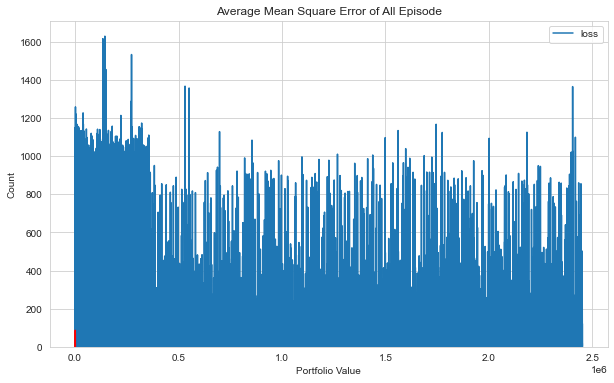

In [13]:
#train


mode = 'train'

portfolio_value = []



for e in tqdm(range(num_episodes)):
    t0 = datetime.now()
    val = play_one_episode(agent, env, mode, scaler)
    dt = datetime.now() - t0
    print(f"episode: {e + 1}/{num_episodes}, episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
    portfolio_value.append(val['portfolio_value'][-1]) 


if mode == 'train':
    # save the DQN
    agent.save(f'state_dict/{stock_name}.npz')

    # save the scaler
    with open(f'scaler/{stock_name}.pkl', 'wb') as f:
        pickle.dump(scaler, f)

    # plot losses
    loss = agent.model.losses
    losses = pd.DataFrame(loss, columns=['loss'])
    losses.plot(figsize=(10,6))
    plt.title('Average Mean Square Error of All Episode')
    plt.xlabel('Step')
    plt.ylabel('Mean Square Error')

print(f'average reward: {np.mean(portfolio_value):.2f}, min: {np.min(portfolio_value):.2f}, max: {np.max(portfolio_value):.2f}')
sns.histplot(portfolio_value, bins=100, color='r', kde=True);
plt.xlabel('Portfolio Value');
plt.ylabel('Count');

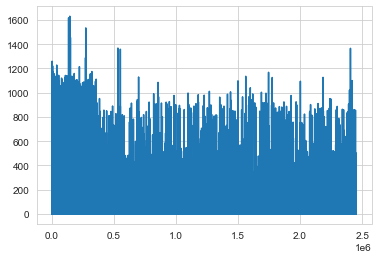

In [14]:
plt.plot(agent.model.losses)

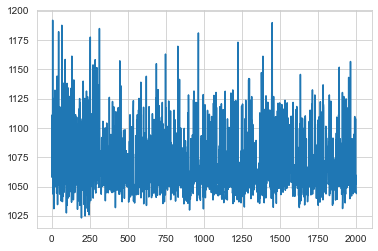

In [15]:
plt.plot(portfolio_value)

episode end value: 958.04, duration: 0:00:00.053010
Sell: 11 times, Buy: 8 times


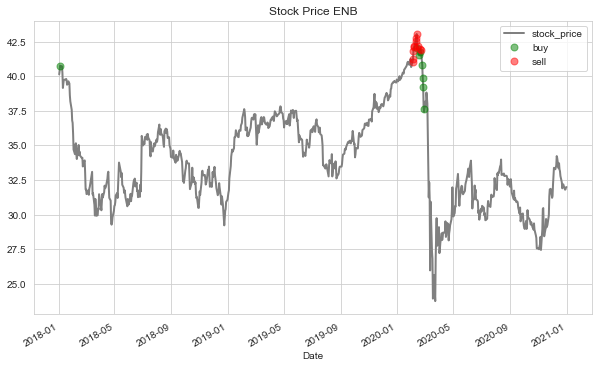

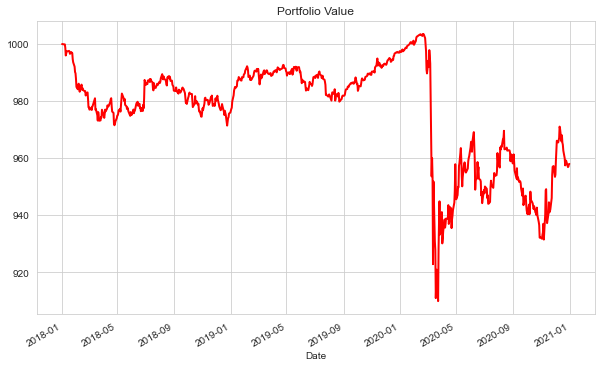

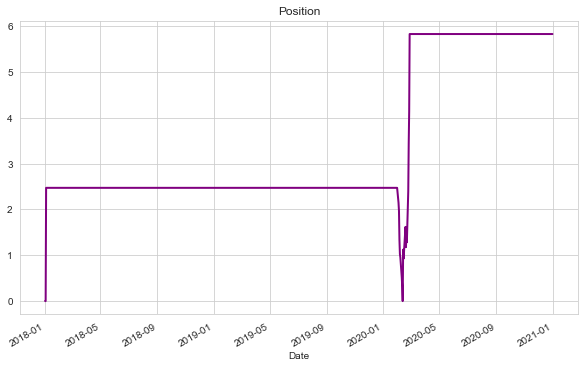

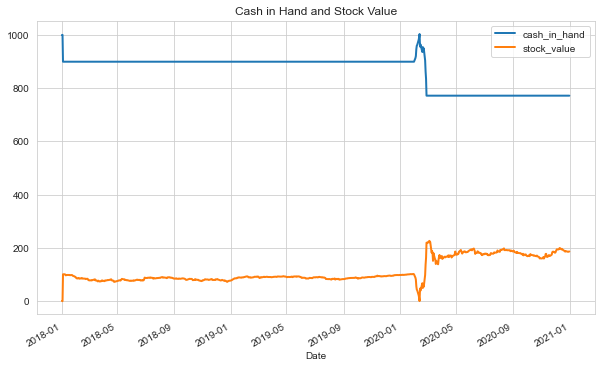

In [16]:
#test

mode = 'test'

portfolio_value = []


with open(f'scaler/{stock_name}.pkl', 'rb') as f:
    scaler = pickle.load(f)
    
env = StockEnv(test_data, capital)
agent.epsilon = 0
agent.load(f'state_dict/{stock_name}.npz')



t0 = datetime.now()
val = play_one_episode(agent, env, mode, scaler)
dt = datetime.now() - t0
print(f"episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
portfolio_value.append(val['portfolio_value'][-1])
    
print(f"Sell: {env.sell_buy.count('sell')} times, Buy: {env.sell_buy.count('buy')} times")



result = pd.DataFrame(val)
result.index = test_data.index

def marker_buy(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'buy':
        return price
    else:
        return np.nan
    
def marker_sell(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'sell':
        return price
    else:
        return np.nan
    
result['marker_buy'] = result[['stock_price', 'sell_buy']].apply(marker_buy, axis=1);
result['marker_sell'] = result[['stock_price', 'sell_buy']].apply(marker_sell, axis=1);

result['stock_price'].plot(figsize=(10,6), c='grey', lw=2);
result['marker_buy'].plot(style='o', ms=7, label='buy', c='g', alpha=0.5);
result['marker_sell'].plot(style='o', ms=7, label='sell', c='r', alpha=0.5);
plt.title('Stock Price '+ stock_name)
plt.legend();
plt.show()



result['portfolio_value'].plot(figsize=(10,6), c='r', lw=2);
plt.title('Portfolio Value');
plt.show()

result['stock_owned'].plot(figsize=(10,6), c='purple', lw=2);
plt.title('Position')
plt.show()

result[['cash_in_hand', 'stock_value']].plot(figsize=(10,6), lw=2);
plt.title('Cash in Hand and Stock Value');
plt.show()

In [17]:


def CAGR(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    n = len(df)/252
    cagr = (df['cumulative_ret'][-1])**(1/n) - 1
    return cagr

def volatility(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    vol = df['daily_ret'].std() * np.sqrt(252)
    return vol


def sharpe(DF, rf):
    df = DF.copy()
    sr = (CAGR(df) - rf)/volatility(df)
    return sr

def max_dd(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    df['cum_roll_max'] = df['cumulative_ret'].cummax()
    df['drawdown'] = df['cum_roll_max'] - df['cumulative_ret']
    df['drawdown_pct'] = df['drawdown']/df['cum_roll_max']
    max_dd = df['drawdown_pct'].max()
    return max_dd

def calmer(DF):
    df = DF.copy()
    clmr = CAGR(df)/max_dd(df)
    return clmr



print(f'Stock name: {stock_name}')
print(f'Start: {result.index[0]}  End: {result.index[-1]}')
print(f'Compound Annual Growth Rate: {CAGR(result)*100:.2f} %')
print(f'Volatility: {volatility(result):.4f}')
print(f'shape ratio: {sharpe(result, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(result)*-100:.2f} %')
print(f'Calmar ratio: {calmer(result):.4f}')
print('-----------------------------------------------------------')
print('-----------------------------------------------------------')
print('Comparing with Adj close')
print(f'Compound Annual Growth Rate (Adj close): {CAGR(test_data)*100:.2f} %')
print(f'Volatility (benchmark): {volatility(test_data):.4f}')
print(f'shape ratio: {sharpe(test_data, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(test_data)*-100:.2f} %')
print(f'Calmar ratio (benchmark): {calmer(test_data):.4f}')

Stock name: ENB
Start: 2018-01-02 00:00:00  End: 2020-12-31 00:00:00
Compound Annual Growth Rate: -1.42 %
Volatility: 0.0539
shape ratio: -0.4673
Maximun drawdown: -9.32 %
Calmar ratio: -0.1522
-----------------------------------------------------------
-----------------------------------------------------------
Comparing with Adj close
Compound Annual Growth Rate (Adj close): -7.29 %
Volatility (benchmark): 0.3362
shape ratio: -0.2495
Maximun drawdown: -44.87 %
Calmar ratio (benchmark): -0.1624


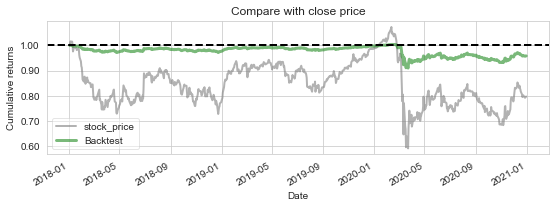

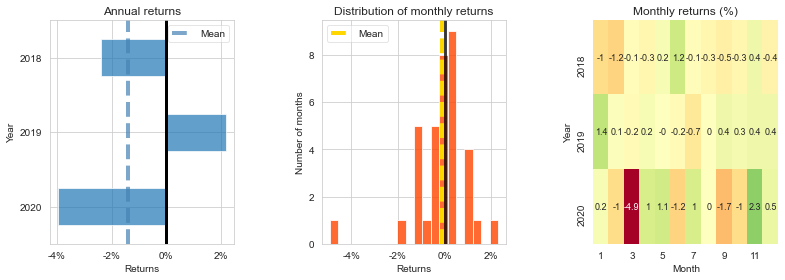

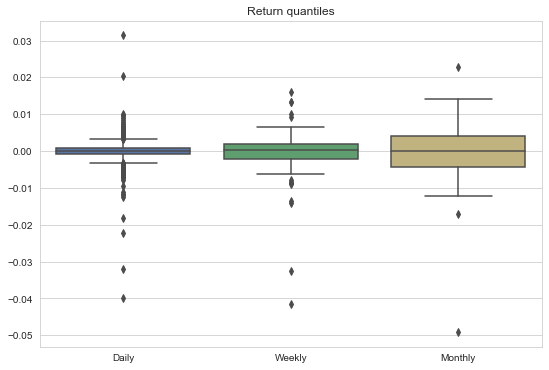

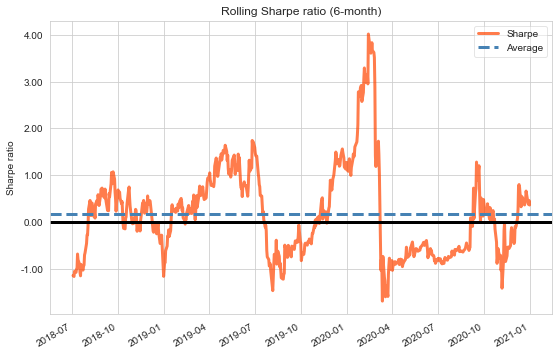

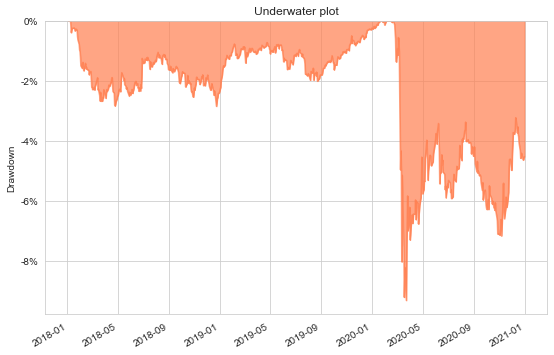

In [18]:


bt_returns = result['portfolio_value'].pct_change()
price = result['stock_price'].pct_change()



plt.figure(figsize=(9,6));
plt.subplot(2,1,1);
pf.plotting.plot_rolling_returns(bt_returns, price);
plt.title('Compare with close price');
plt.show()

fig = plt.figure(1)
plt.subplot(1,3,1)
pf.plot_annual_returns(bt_returns)
plt.subplot(1,3,2)
pf.plot_monthly_returns_dist(bt_returns)
plt.subplot(1,3,3)
pf.plot_monthly_returns_heatmap(bt_returns)
plt.tight_layout()
fig.set_size_inches(12,4)

plt.figure(figsize=(9,6))
pf.plot_return_quantiles(bt_returns);



plt.figure(figsize=(9,6))
pf.plot_rolling_sharpe(bt_returns);

plt.figure(figsize=(9,6))
pf.plot_drawdown_underwater(bt_returns);

score = (sharpe(result, 0.011) - sharpe(test_data, 0.011))*10
ret = ((result['portfolio_value'][-1] - result['portfolio_value'][0])/result['portfolio_value'][0]) * 100
with open(f'score/{stock_name}.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump([stock_name, industry,score, ret], f)
    
    
result.to_csv(f'../data/{stock_name}.csv')